In [1]:
#I have written code up until the second mean sales calculation on holidays
#This project is focused on learning python for data science so there are a lot of mess ups
import pandas as pd
WALMART_PATH = "datasets/Walmart/WalmartData.csv"
stores = pd.read_csv(WALMART_PATH)
stores.head()
    
    


Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'CPI'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

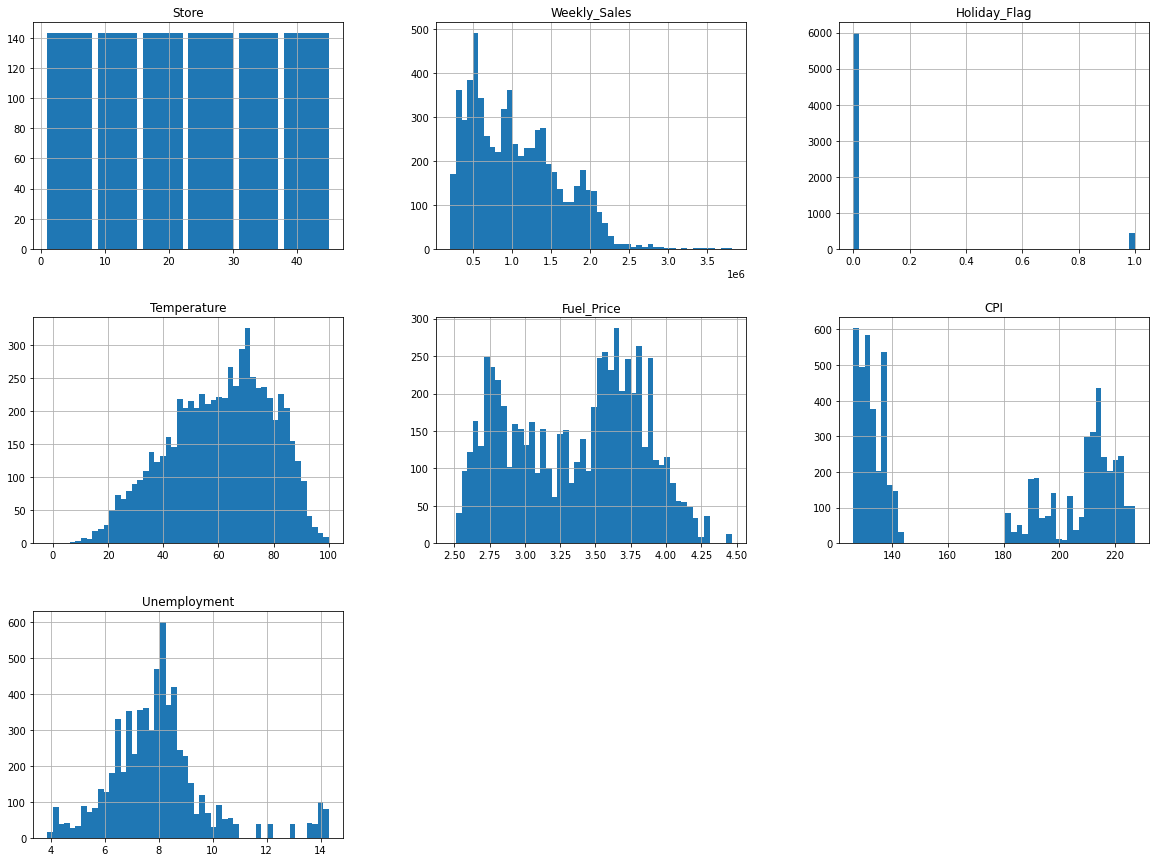

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
stores.hist(bins = 50,figsize=(20,15))

In [3]:
corr_matrix = stores.corr()
corr_matrix["Weekly_Sales"].sort_values(ascending=False)

Weekly_Sales    1.000000
Holiday_Flag    0.036891
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64

In [4]:
#Add column that represents date using integers
df = pd.DataFrame(stores)
maxStoreNumber = df["Store"].max() + 1
rowNumberArr = []
for i in range(1, maxStoreNumber):
    rowNumberArr += list(range(1,len(stores[stores["Store"] == i]) + 1))
stores["Number_Date"] = rowNumberArr

In [23]:
#Seperates each day, month and year
stores["Day"]= pd.DatetimeIndex(stores['Date']).day
stores['Month'] = pd.DatetimeIndex(stores['Date']).month
stores['Year'] = pd.DatetimeIndex(stores['Date']).year
stores

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  Number_Date  Day  Month  Year  
0     211.096358         8.106            1    2      5  2010  
1     211.242170         8.106            2    2     12  2010  
2     211.289143         8.106            3   19      2  2010  
3     211.319643         8.106            4   26      2  2010  
4     211.350143         8.106            5    3      5  2010  
...          ...           ...          ...  ...    ...   ...  
6430  192.013558         8.684          139   28      9  2012  
6431  192.170412         8.667          140   10      5  2012  
6432  192.327265         8.667          141   10     12  2012  
6433  192.330854         8.667          142   19     10  2012  
6434  192.308899         8.667          143   26     10  2012  

[6435 rows x 12 columns]

array([[<AxesSubplot:xlabel='Holiday_Flag', ylabel='Holiday_Flag'>,
        <AxesSubplot:xlabel='CPI', ylabel='Holiday_Flag'>,
        <AxesSubplot:xlabel='Store', ylabel='Holiday_Flag'>,
        <AxesSubplot:xlabel='Unemployment', ylabel='Holiday_Flag'>,
        <AxesSubplot:xlabel='Weekly_Sales', ylabel='Holiday_Flag'>,
        <AxesSubplot:xlabel='Number_Date', ylabel='Holiday_Flag'>],
       [<AxesSubplot:xlabel='Holiday_Flag', ylabel='CPI'>,
        <AxesSubplot:xlabel='CPI', ylabel='CPI'>,
        <AxesSubplot:xlabel='Store', ylabel='CPI'>,
        <AxesSubplot:xlabel='Unemployment', ylabel='CPI'>,
        <AxesSubplot:xlabel='Weekly_Sales', ylabel='CPI'>,
        <AxesSubplot:xlabel='Number_Date', ylabel='CPI'>],
       [<AxesSubplot:xlabel='Holiday_Flag', ylabel='Store'>,
        <AxesSubplot:xlabel='CPI', ylabel='Store'>,
        <AxesSubplot:xlabel='Store', ylabel='Store'>,
        <AxesSubplot:xlabel='Unemployment', ylabel='Store'>,
        <AxesSubplot:xlabel='Weekly_Sales'

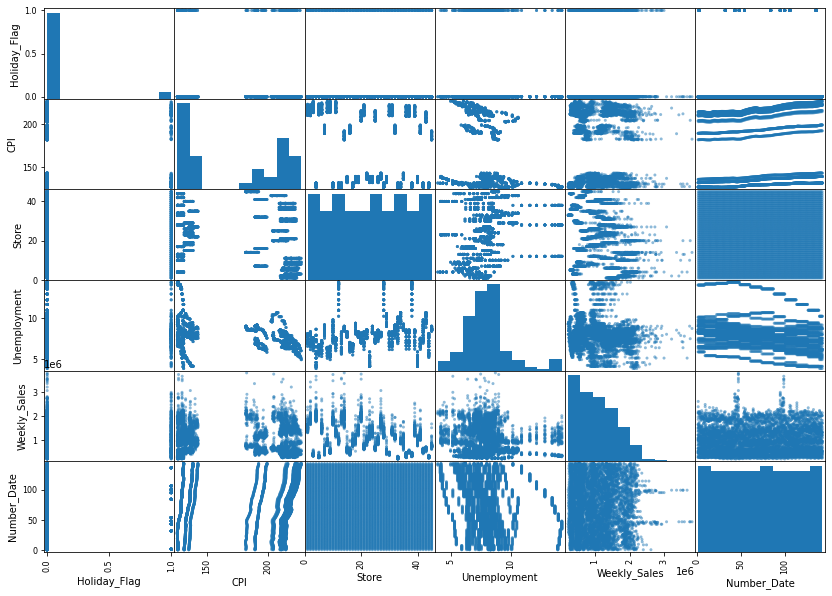

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["Holiday_Flag","CPI","Store","Unemployment","Weekly_Sales","Number_Date"]
scatter_matrix(stores[attributes],figsize = (14,10))

maxValue  (20, 301397792.46000004)


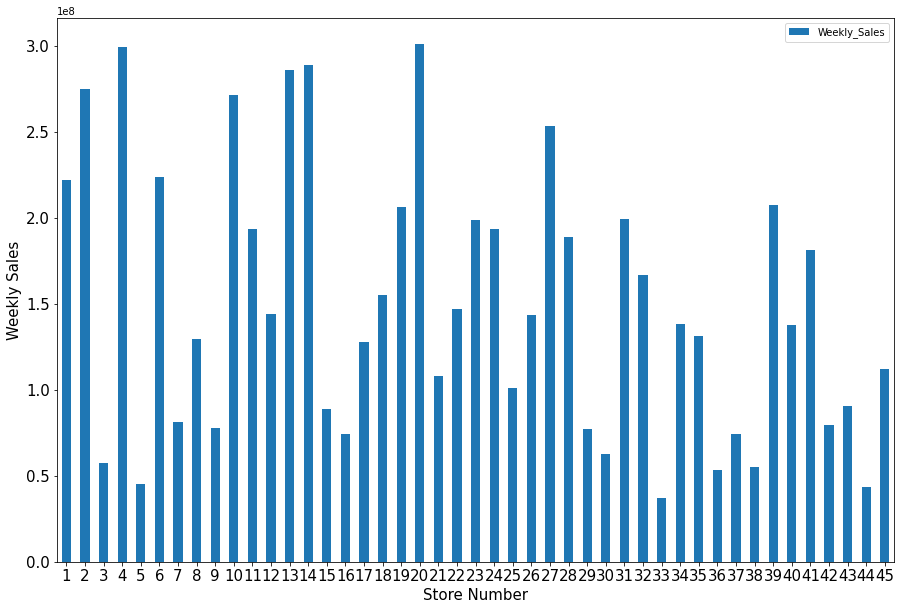

In [6]:
#stat tasks, finding best selling store
arr = []
maxSales = 0
maxTuple = ()
salesData = {}
salesArray = []
storeNumberArr = list(range(1,maxStoreNumber))
for i in range(1,maxStoreNumber):
    salesSum = stores.loc[stores['Store'] == i, 'Weekly_Sales'].sum()
    salesArray.append(salesSum)
    storeSalesTuple = (i,salesSum)
    arr.append(storeSalesTuple)
    if salesSum > maxSales:
        maxSales = salesSum
        maxTuple = storeSalesTuple
print("maxValue ", maxTuple)
salesData["Store_Number"] = storeNumberArr
salesData["Weekly_Sales"] = salesArray
df = pd.DataFrame(salesData,columns=['Store_Number','Weekly_Sales'])
ax = df.plot(x ='Store_Number', y='Weekly_Sales', kind = 'bar',figsize=(15, 10))
ax.set_xlabel("Store Number",fontsize=15)
ax.set_ylabel("Weekly Sales",fontsize=15)
plt.xticks(fontsize=15,rotation = 0)
plt.yticks(fontsize=15)
plt.show()




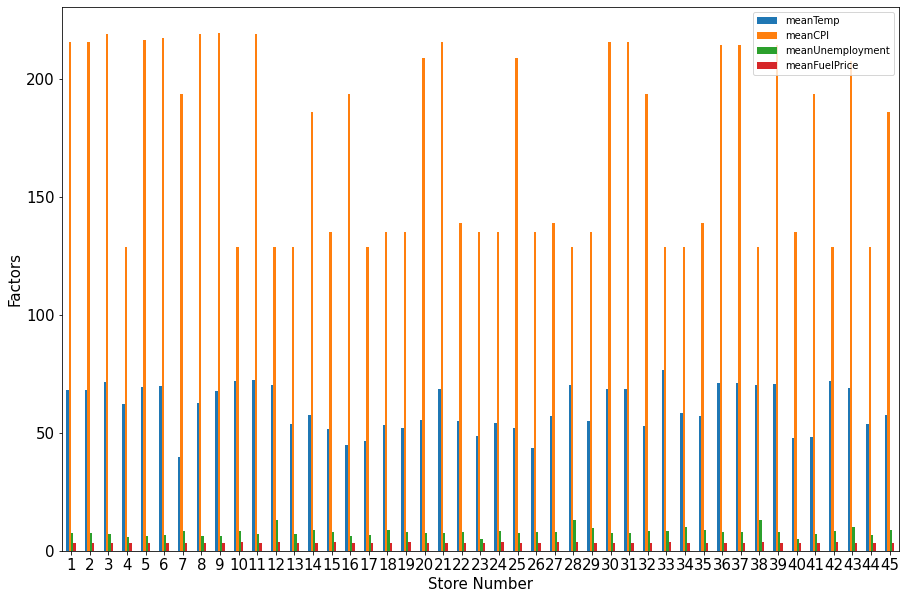

In [7]:
summaryData = {}
meanTemp = []
meanCPI = []
meanUnemployment = []
meanFuelPrice = []
for i in range(1,maxStoreNumber):
    rowLength = stores[stores['Store'] == i].shape[0]
    storeTempMean = (stores.loc[stores['Store'] == i, 'Temperature'].sum())/rowLength
    meanTemp.append(storeTempMean)
    
    storeCPIMean = (stores.loc[stores['Store'] == i, 'CPI'].sum())/ rowLength
    meanCPI.append(storeCPIMean)
    
    storeUnemploymentMean = (stores.loc[stores['Store'] == i, 'Unemployment'].sum())/rowLength
    meanUnemployment.append(storeUnemploymentMean)
    
    storeFuelPriceMean = (stores.loc[stores['Store'] == i, 'Fuel_Price'].sum())/rowLength
    meanFuelPrice.append(storeFuelPriceMean)
    
summaryData["Store_Number"] = storeNumberArr    
summaryData["meanTemp"] = meanTemp
summaryData["meanCPI"] = meanCPI
summaryData["meanUnemployment"] = meanUnemployment
summaryData["meanFuelPrice"] = meanFuelPrice

df = pd.DataFrame(summaryData,columns=['Store_Number','meanTemp',"meanCPI","meanUnemployment","meanFuelPrice"])
ax = df.plot(x ='Store_Number', y=['meanTemp','meanCPI','meanUnemployment','meanFuelPrice'], kind = 'bar',figsize=(15, 10))
ax.set_xlabel("Store Number",fontsize=15)
ax.set_ylabel("Factors",fontsize=15)
plt.xticks(fontsize=15,rotation = 0)
plt.yticks(fontsize=15)
plt.show()
        


max std dev sales (14, 317569.9494755083)


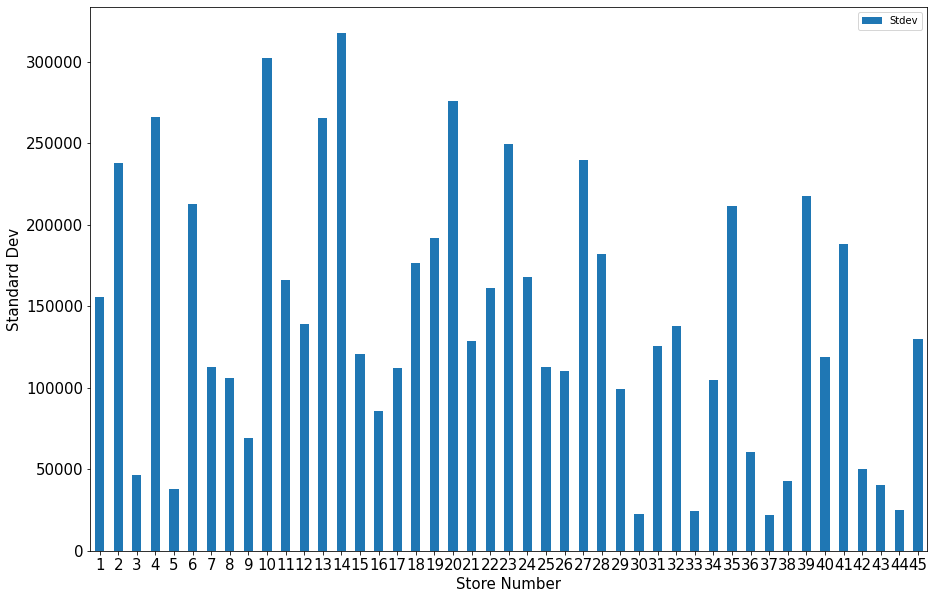

In [8]:
#finding max standard deviation
from statistics import stdev
import numpy as np
standardDevArr = []
maxTuple = ()
maxStandardDev = 0
stdevData = {}
for i in range(1,maxStoreNumber):
    selectStore = stores[stores["Store"] == i]
    stdevStore = selectStore["Weekly_Sales"].std()
    standardDevArr.append(stdevStore)
    stdevTuple = (i,stdevStore)
    if stdevStore > maxStandardDev:
        maxTuple = stdevTuple
        maxStandardDev = stdevStore
print("max std dev sales", maxTuple)
stdevData["Store_Number"] = storeNumberArr
stdevData["Stdev"] = standardDevArr
df = pd.DataFrame(stdevData,columns=['Store_Number','Stdev'])
ax = df.plot(x ='Store_Number', y='Stdev', kind = 'bar',figsize=(15, 10))
ax.set_xlabel("Store Number",fontsize=15)
ax.set_ylabel("Standard Dev",fontsize=15)
plt.xticks(fontsize=15,rotation = 0)
plt.yticks(fontsize=15)
plt.show()
        


superBowl mean 142515272.2891305
christmas mean 84595089.16956519
laborDayMean 137668387.18695658
thanksgiving Mean  129536030.05434783


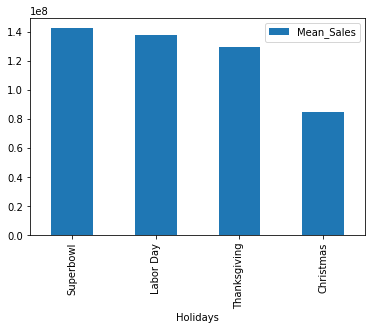

In [9]:
# incorrect way to find what holidays are impactful
#calculating mean is too complex and incorrect
import matplotlib.pyplot as plt
holidayDictionary = {}
holidayDictionary["Holidays"] = ['Superbowl','Labor Day','Thanksgiving','Christmas']
superbowlSum = 0
laborDaySum = 0
thanksgivingSum = 0
christmasSum = 0
superBowlDates = pd.Series(['12-02-2010','11-02-2011','10-02-2012','08-02-2013'])
laborDayDates = pd.Series(['10-09-2010','09-09-2011','07-09-2012','06-09-2013'])
thanksgivingDates = pd.Series(['26-11-2010','25-11-2011','23-11-2012','29-11-2013'])
christmasDates = pd.Series(['31-12-2010','30-12-2011','28-12-2012','27-12-2013'])
for i in range(1,maxStoreNumber):
    superBowlTable = (stores['Date'].isin(superBowlDates))
    superbowlSum += stores.loc[superBowlTable, 'Weekly_Sales'].sum()
    
    christmasTable = (stores['Date'].isin(christmasDates))
    christmasSum += stores.loc[christmasTable,'Weekly_Sales'].sum()
    
    laborDayTable = (stores['Date'].isin(laborDayDates))
    laborDaySum += stores.loc[laborDayTable,'Weekly_Sales'].sum()
    
    thanksgivingTable = (stores['Date'].isin(thanksgivingDates))
    thanksgivingSum += stores.loc[thanksgivingTable,'Weekly_Sales'].sum()
    
superbowlMean = superbowlSum / maxStoreNumber
christmasMean = christmasSum / maxStoreNumber
laborDayMean = laborDaySum / maxStoreNumber
thanksgivingMean = thanksgivingSum / maxStoreNumber
print('superBowl mean',superbowlMean)
print('christmas mean',christmasMean)
print('laborDayMean',laborDayMean) 
print('thanksgiving Mean ',thanksgivingMean)
holidayDictionary["Mean_Sales"] = [superbowlMean,laborDayMean,thanksgivingMean,christmasMean]
df = pd.DataFrame(holidayDictionary,columns=['Holidays','Mean_Sales'])
df.plot(x ='Holidays', y='Mean_Sales', kind = 'bar')
plt.show()


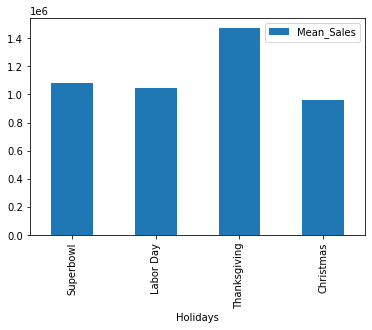

{'Super_Bowl_Sales': 1079127.9877037038,
 'Labour_Day_Sales': 1042427.293925926,
 'Thanksgiving_Sales': 1471273.427777778,
 'Christmas_Sales': 960833.1115555555,
 'Non_Holiday_Sales': 1041256.3802088555}

In [10]:
# From this point on, this is not my code. I looked up the answers on Kaggle
#correct way to find mean of holidays and finding what holidays are impactful
#Defining holiday dates
superBowlDates = pd.Series(['12-02-2010','11-02-2011','10-02-2012','08-02-2013'])
laborDayDates = pd.Series(['10-09-2010','09-09-2011','07-09-2012','06-09-2013'])
thanksgivingDates = pd.Series(['26-11-2010','25-11-2011','23-11-2012','29-11-2013'])
christmasDates = pd.Series(['31-12-2010','30-12-2011','28-12-2012','27-12-2013'])
holidayGraph = {}
holidayGraph["Holidays"] = ['Superbowl','Labor Day','Thanksgiving','Christmas']
#Calculating mean sales on holidays : 
Super_Bowl_Sales = (pd.DataFrame(stores.loc[stores.Date.isin(superBowlDates)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(stores.loc[stores.Date.isin(laborDayDates)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(stores.loc[stores.Date.isin(thanksgivingDates)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(stores.loc[stores.Date.isin(christmasDates)]))['Weekly_Sales'].mean()
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales
#Calculating mean sales on non-holidays :
Non_Holiday_Sales = stores[stores['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales
Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales,
              'Non_Holiday_Sales': Non_Holiday_Sales}
holidayGraph["Mean_Sales"] = [Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales]
df = pd.DataFrame(holidayGraph,columns=['Holidays','Mean_Sales'])
df.plot(x ='Holidays', y='Mean_Sales', kind = 'bar')
plt.show()
Mean_Sales 


    

<AxesSubplot:title={'center':'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

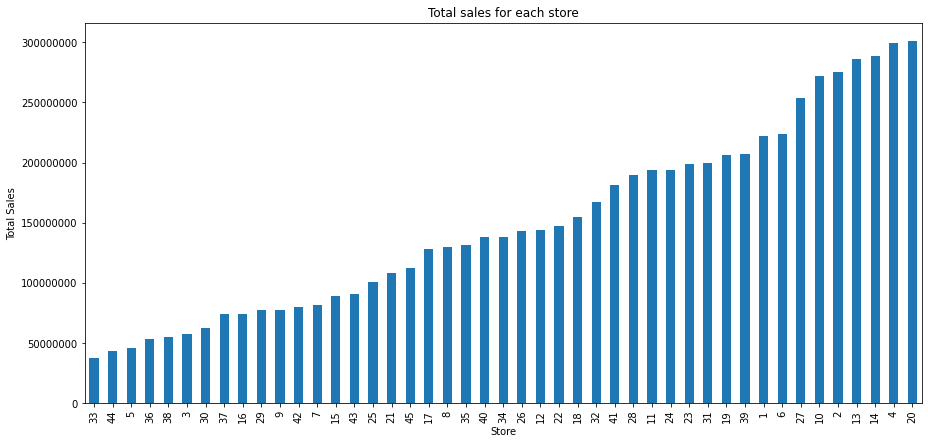

In [11]:
#max sales
total_sales= stores.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

In [12]:
#max std
walmart_data_std = pd.DataFrame(stores.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
walmart_data_std.head(1).index[0] , walmart_data_std.head(1).Weekly_Sales[walmart_data_std.head(1).index[0]]

(14, 317569.9494755081)

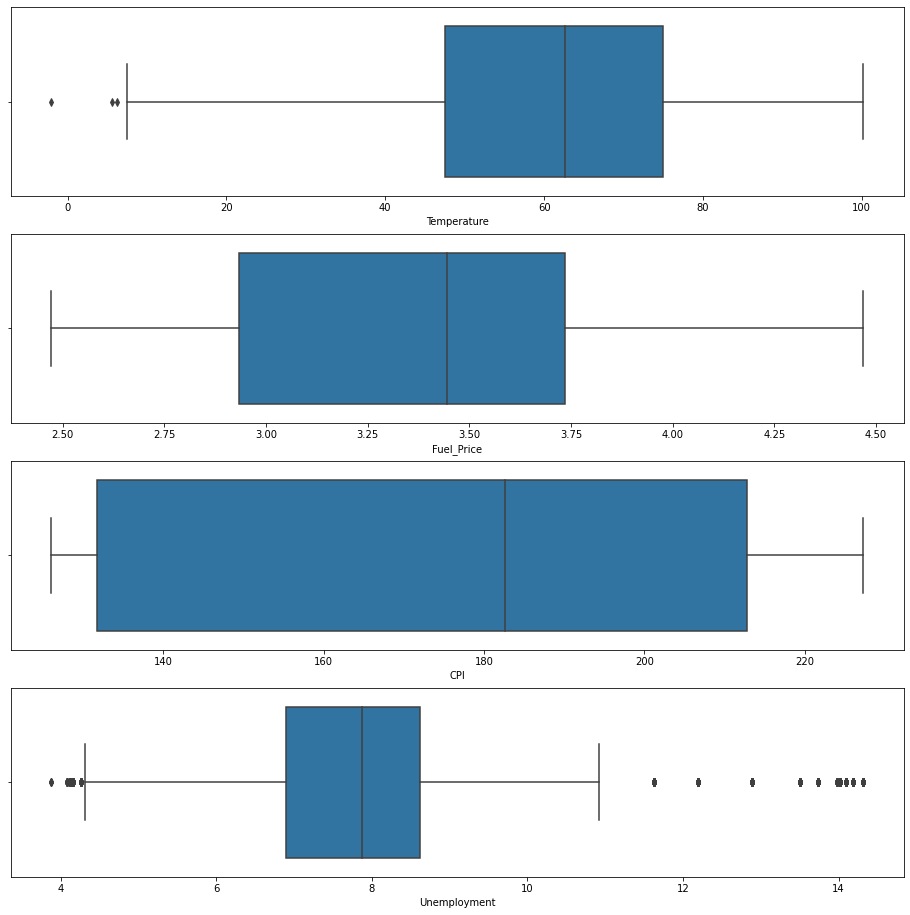

In [13]:
import seaborn as sns
fig, axis = plt.subplots(4,figsize=(16,16))
X = stores[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(x=stores[column],ax=axis[i])

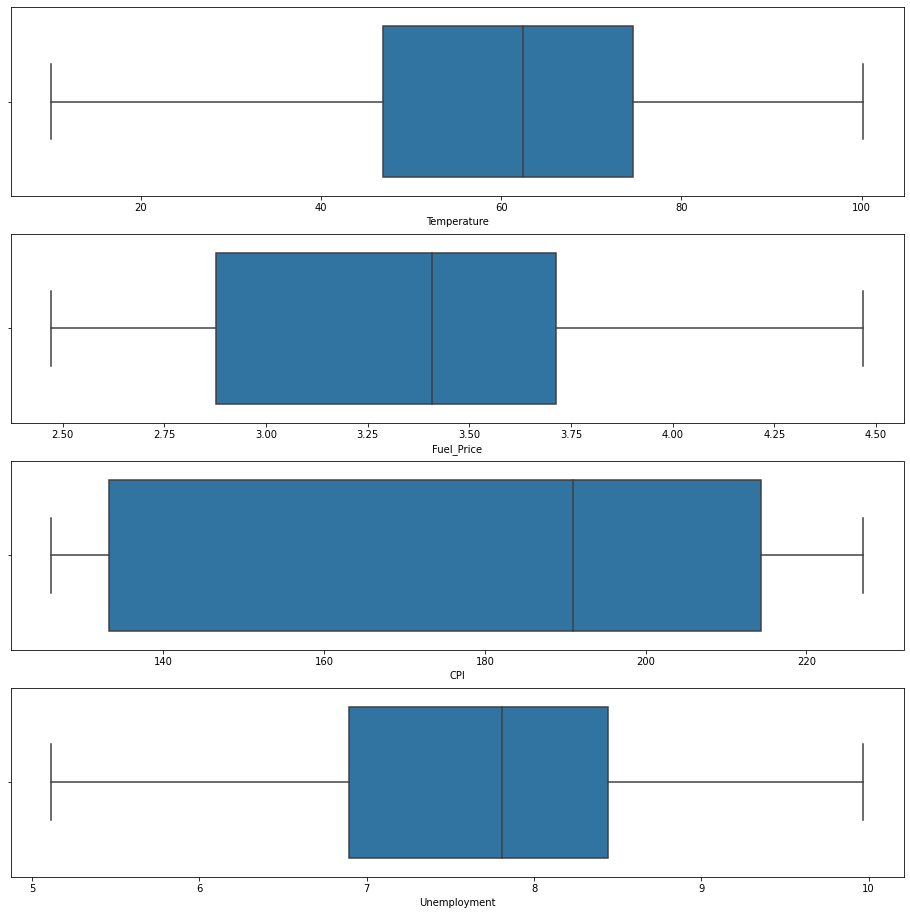

In [14]:
walmart_data_clean = stores[(stores['Unemployment'] < 10) & (stores['Unemployment'] > 5) & (stores['Temperature'] > 10)]
fig, axis = plt.subplots(4,figsize=(16,16))
X = stores[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(x=walmart_data_clean[column],ax=axis[i])

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  Number_Date  
0     211.096358         8.106            1  
1     211.242170         8.106            2  
2     211.289143         8.106            3  
3     211.319643         8.106            4  
4     211.350143         8.106            5  
...          ...           ...          ...  
6430  192.013558         8.684          139  
6431  192.170412         8.667          140  
6432  192.327265         8.667          141  
6433  192.330854         8.667          142  
6434  192.308899         8.667          143  

[6435 rows x 9 columns]

In [30]:
from sklearn.model_selection import train_test_split

stores_num_date = stores.drop("Date",axis=1)
full_train_set, full_test_set = train_test_split(stores_num_date,test_size=0.2,random_state=42)
train_set = full_train_set.drop("Weekly_Sales",axis=1)
train_set_labels = full_train_set["Weekly_Sales"].copy()
test_set = full_test_set.drop("Weekly_Sales",axis=1)
test_set_labels = full_test_set["Weekly_Sales"].copy()


Coefficent of determination 0.1483175766278827
lin_mse  270423834664.2192
lin_rmse 520022.9174413559


<AxesSubplot:ylabel='Weekly_Sales'>

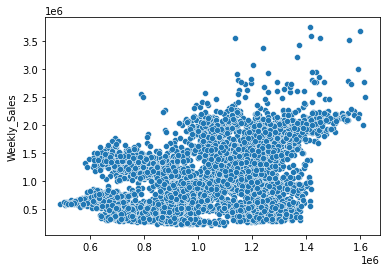

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train_set,train_set_labels)
sales_predictions = lin_reg.predict(train_set)
print('Coefficent of determination',
      lin_reg.score(train_set,train_set_labels))
lin_mse = mean_squared_error(train_set_labels,
                             sales_predictions)
print('lin_mse ', lin_mse)
lin_rmse = np.sqrt(lin_mse)
print('lin_rmse',lin_rmse)

#x-axis is the predictions and y-axis is actual labels
#in this graph, predictions can result in many different 
# weekly sales values so accuracy not good
sns.scatterplot(x=sales_predictions,y=train_set_labels)




Coefficent of determination 0.9934916780175671
forest_mse  2066504297.1656396
forest_rmse 45458.8197951249


<AxesSubplot:ylabel='Weekly_Sales'>

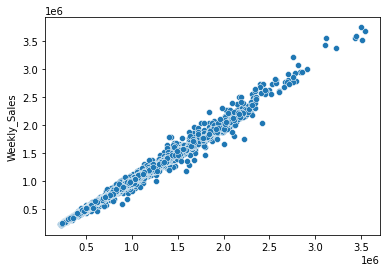

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_set,train_set_labels)
forest_sales_predictions = forest_reg.predict(train_set)

print('Coefficent of determination',forest_reg.score(
    train_set,train_set_labels))
forest_mse = mean_squared_error(
    train_set_labels,forest_sales_predictions)
print('forest_mse ', forest_mse)
forest_rmse = np.sqrt(forest_mse)
print('forest_rmse',forest_rmse)

#x-axis is the predictions and y-axis is actual labels
#in this graph, predictions and the actual
#results are closely related
sns.scatterplot(x=forest_sales_predictions,
                y=train_set_labels)



Coefficent of determination 0.9509215277411278
forest test mse  15810853863.445738
forest test rmse  125741.217838248


<AxesSubplot:ylabel='Weekly_Sales'>

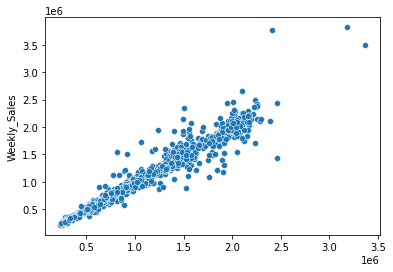

In [40]:
#test random forest regressor model on test data

forest_test_sales_predictions = forest_reg.predict(test_set)

print('Coefficent of determination',forest_reg.score(
    test_set,test_set_labels))
forest_test_mse = mean_squared_error(
    test_set_labels,forest_test_sales_predictions)
print('forest test mse ',forest_test_mse)
forest_test_rmse = np.sqrt(forest_test_mse)
print('forest test rmse ', forest_test_rmse)

sns.scatterplot(x=forest_test_sales_predictions,
                y=test_set_labels)
